In [1]:
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ctgan import CTGANSynthesizer
from sklearn.model_selection import train_test_split
from utils import *

MODELS_PATH = './models'
DATA_PATH = './data/'
dataset = 'adult'
seed = 1
np.random.seed(seed)

In [2]:
from ctgan import load_demo
data = load_demo()

categorical_features = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
]


In [3]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]
le = LabelEncoder()
y = le.fit_transform(y)

In [4]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
preprocessor = get_preprocessor(X, categorical_features)
rf = RandomForestClassifier(n_jobs=-1, random_state=seed)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.859


Epoch 1, Loss G: 0.48099577771059626, loss_bb: 0.48099577771059626
Epoch 2, Loss G: 0.4708172453989208, loss_bb: 0.4708172453989208
Epoch 3, Loss G: 0.5030558791531646, loss_bb: 0.5030558791531646
Epoch 4, Loss G: 0.4911168052742763, loss_bb: 0.4911168052742763
Epoch 5, Loss G: 0.48948568111671753, loss_bb: 0.48948568111671753
Epoch 6, Loss G: 0.4827559785764251, loss_bb: 0.4827559785764251
Epoch 7, Loss G: 0.47651721926450485, loss_bb: 0.47651721926450485
Epoch 8, Loss G: 0.4900873434200394, loss_bb: 0.4900873434200394
Epoch 9, Loss G: 0.4870665049957766, loss_bb: 0.4870665049957766
Epoch 10, Loss G: 0.4805539045944552, loss_bb: 0.4805539045944552
Epoch 11, Loss G: 0.4879396272234253, loss_bb: 0.4879396272234253
Epoch 12, Loss G: 0.4860848524424359, loss_bb: 0.4860848524424359
Epoch 13, Loss G: 0.4828448803518752, loss_bb: 0.4828448803518752
Epoch 14, Loss G: 0.49729467874239014, loss_bb: 0.49729467874239014
Epoch 15, Loss G: 0.48914732276054684, loss_bb: 0.48914732276054684
Epoch 16,

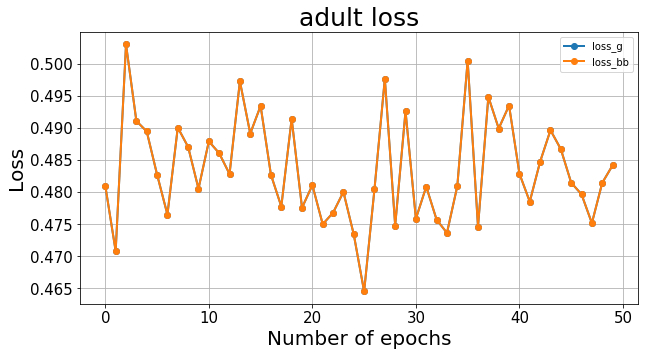

In [5]:
z_features = get_noise_features(X_train, categorical_features)
z_rows = int(0.25 * X_train.shape[0])
z = gen_random_noise(shape=(z_rows, z_features))
batch_size = 500
epochs = 50
confidence_level = 0.9 
gen_lr = 2e-5
loss = 'log'

rf_ctgan = CTGANSynthesizer(batch_size=batch_size, 
                            blackbox_model=rf, 
                            preprocessing_pipeline=preprocessor, 
                            bb_loss=loss
                            )

hist = rf_ctgan.fit(train_data=z, 
                    epochs=epochs,
                    confidence_level=confidence_level,
                    gen_lr=gen_lr,
                    )

rf_ctgan.save(f"{MODELS_PATH}/{dataset}_ctgan_c_{confidence_level}.pkl")

plot_losses(hist, title=dataset + ' loss')
print()